In [8]:
# Step 1: Load and explore the dataset

import pandas as pd

# Load the dataset
# 1) Load the data
path = r"C:\Users\laptop\Desktop\exported_students_data.csv"
df = pd.read_csv(path)
df = pd.read_csv(path)

# Display columns
print(" Columns in the dataset:")
print(df.columns.tolist())

# Preview the data
print("\n First 5 rows:")
print(df.head())

# Check for missing values
print("\n Missing values:")
print(df.isnull().sum())

# Summary statistics
print("\n Summary statistics:")
print(df.describe(include='all'))


 Columns in the dataset:
['Full Name', 'Academic Performance', 'Attendance Percentage', 'Seat Zone', 'Grades', 'Academic Stress', 'Motivation', 'Depression', 'Sleep Disorder', 'Study Life Balance', 'Family Pressures', 'Parents Marital Status', 'Family Income Level', 'Housing Status', 'Has Private Study Room', 'Daily Food Availability', 'Has School Uniform', 'Has Stationery', 'Receives Private Tutoring', 'Daily Study Hours', 'Works After School', 'Has Electronic Device', 'Device Usage Purpose', 'Has Social Media Accounts', 'Daily Screen Time', 'Social Media Impact On Studies', 'Content Type Watched', 'Plays Video Games', 'Daily Gaming Hours']

 First 5 rows:
           Full Name Academic Performance  Attendance Percentage Seat Zone  \
0     Joshua Douglas              Average                  86.16    Middle   
1  Christine Houston              Average                  96.45      Back   
2        Jill Joseph              Average                  75.05      Back   
3      Kelly Johnson  

In [27]:
import numpy as np

# Function to parse grades and calculate average (GPA)
def parse_grades(grades_str):
    parts = grades_str.split(';')
    scores = []
    for part in parts:
        if ':' in part:
            try:
                _, score = part.split(':')
                scores.append(float(score.strip()))
            except:
                continue
    return np.mean(scores) if scores else np.nan

# Apply GPA calculation
df['Calculated_GPA'] = df['Grades'].apply(parse_grades)

# Show a preview
print(" GPA Calculation Example:")
print(df[['Grades', 'Calculated_GPA']].head())


 GPA Calculation Example:
                                              Grades  Calculated_GPA
0  Mathematics:69.91; Art:59.74; Physics:64.29; C...        63.16500
1  Mathematics:57.80; Art:54.81; Physics:48.67; C...        53.11750
2  Mathematics:59.54; Art:65.64; Physics:68.57; C...        65.11125
3  Mathematics:64.63; Art:63.91; Physics:63.36; C...        66.57875
4  Mathematics:63.96; Art:67.25; Physics:65.06; C...        64.24250


In [29]:
# Function to classify performance based on GPA and attendance
def classify_performance(gpa, attendance):
    if pd.isnull(gpa) or pd.isnull(attendance):
        return "Unknown"
    
    if gpa >= 90:
        label = "Excellent"
    elif gpa >= 80:
        label = "Very Good"
    elif gpa >= 70:
        label = "Good"
    elif gpa >= 60:
        label = "Average"
    else:
        label = "Needs Improvement"
    
    # Modify based on attendance
    if attendance >= 95:
        if label == "Very Good":
            label = "Excellent"
        elif label == "Good":
            label = "Very Good"
        elif label == "Average":
            label = "Good"
        elif label == "Needs Improvement":
            label = "Average"
    elif attendance < 80:
        if label == "Excellent":
            label = "Very Good"
        elif label == "Very Good":
            label = "Good"
        elif label == "Good":
            label = "Average"
        elif label == "Average":
            label = "Needs Improvement"
    
    return label

# Apply performance label
df['performance_label'] = df.apply(
    lambda row: classify_performance(row['Calculated_GPA'], row['Attendance Percentage']), axis=1
)

# Preview
print(df[['Calculated_GPA', 'Attendance Percentage', 'performance_label']].head())


   Calculated_GPA  Attendance Percentage  performance_label
0        63.16500                  86.16            Average
1        53.11750                  96.45            Average
2        65.11125                  75.05  Needs Improvement
3        66.57875                  92.53            Average
4        64.24250                  75.28  Needs Improvement


In [31]:
# Ordinal encoding for categorized fields
ordinal_maps = {
    'Academic Stress': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Motivation': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Study Life Balance': {'Needs Improvement': 1, 'Moderate': 2, 'Good': 3},
    'Family Pressures': {'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3},
    'Sleep Disorder': {'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3}
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)

# Convert boolean fields to integers
bool_cols = [
    'Depression', 'Has Private Study Room', 'Daily Food Availability',
    'Has School Uniform', 'Has Stationery', 'Receives Private Tutoring',
    'Works After School', 'Has Electronic Device', 'Has Social Media Accounts',
    'Plays Video Games'
]

for col in bool_cols:
    df[col] = df[col].astype(int)

# Preview the transformed dataset
df[bool_cols + list(ordinal_maps.keys())].head()


,Depression,Has Private Study Room,Daily Food Availability,Has School Uniform,Has Stationery,Receives Private Tutoring,Works After School,Has Electronic Device,Has Social Media Accounts,Plays Video Games,Academic Stress,Motivation,Study Life Balance,Family Pressures,Sleep Disorder
0,0,0,1,1,1,1,1,0,0,1,3,2,1,1.0,2.0
1,0,0,1,0,0,1,1,0,0,0,3,3,3,2.0,3.0
2,1,1,0,1,1,0,1,1,1,0,1,3,3,NaN,2.0
3,0,1,0,0,1,1,0,0,0,1,2,1,3,3.0,3.0
4,1,0,0,1,1,0,1,1,0,1,2,3,3,NaN,2.0


In [35]:
from sklearn.preprocessing import LabelEncoder

# Columns that need to be label encoded
categorical_columns = [
    'Parents Marital Status', 'Housing Status', 'Device Usage Purpose', 
    'Social Media Impact On Studies', 'Content Type Watched'
]

# Label encoding for categorical columns
le = LabelEncoder()

for col in categorical_columns:
    df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert to string before applying LabelEncoder

# Now proceed with your previous code for splitting data and training the model
X = df_model.drop(columns=["performance_label"])
y = df_model["performance_label"]

# Encode target labels
y_enc = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f" Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 Accuracy: 0.8222

 Classification Report:
                   precision    recall  f1-score   support

          Average       0.69      0.75      0.72        12
        Excellent       1.00      1.00      1.00         3
             Good       0.50      0.50      0.50         6
Needs Improvement       1.00      0.89      0.94        19
        Very Good       0.83      1.00      0.91         5

         accuracy                           0.82        45
        macro avg       0.81      0.83      0.81        45
     weighted avg       0.83      0.82      0.83        45


 Confusion Matrix:
[[ 9  0  3  0  0]
 [ 0  3  0  0  0]
 [ 2  0  3  0  1]
 [ 2  0  0 17  0]
 [ 0  0  0  0  5]]


C:\Users\Hawraa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
# Remove unprocessed textual columns
exclude_columns = [
    "Full Name", "Grades", "Academic Performance", "Seat Zone",
    "Parents Marital Status", "Housing Status", "Device Usage Purpose",
    "Social Media Impact On Studies", "Content Type Watched"
]

# Copy the data and remove the specified columns
df_model = df.drop(columns=exclude_columns)

# Remove any rows with missing values
df_model = df_model.dropna()

# Separate features and target variable
X = df_model.drop(columns=["performance_label"])
y = df_model["performance_label"]

# Encode the target variable
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9910

Classification Report:
                   precision    recall  f1-score   support

          Average       0.99      0.99      0.99       138
        Excellent       0.97      1.00      0.98        32
             Good       0.98      0.99      0.98       121
Needs Improvement       1.00      1.00      1.00       201
        Very Good       1.00      0.97      0.98        64

         accuracy                           0.99       556
        macro avg       0.99      0.99      0.99       556
     weighted avg       0.99      0.99      0.99       556


Confusion Matrix:
[[136   0   2   0   0]
 [  0  32   0   0   0]
 [  1   0 120   0   0]
 [  0   0   0 201   0]
 [  0   1   1   0  62]]


C:\Users\Hawraa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


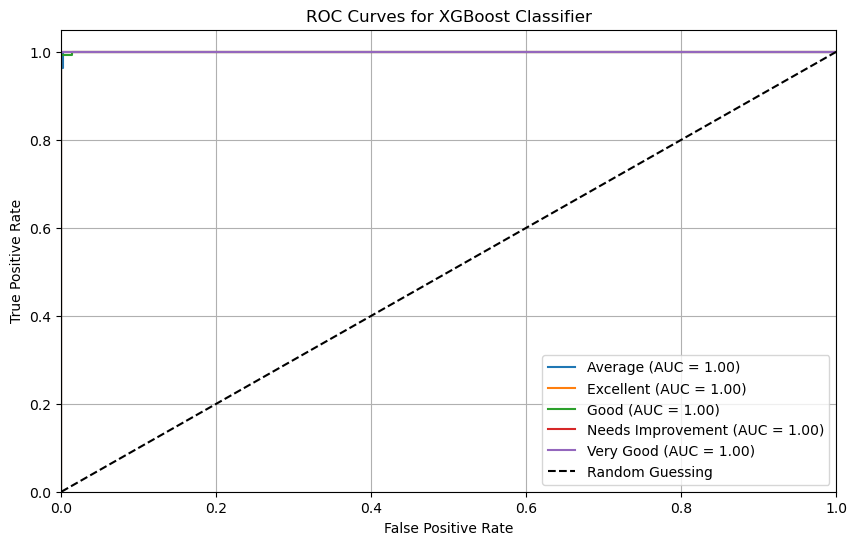

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = xgb_model.predict_proba(X_test)

# Compute ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    class_name = le.inverse_transform([i])[0]
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for XGBoost Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


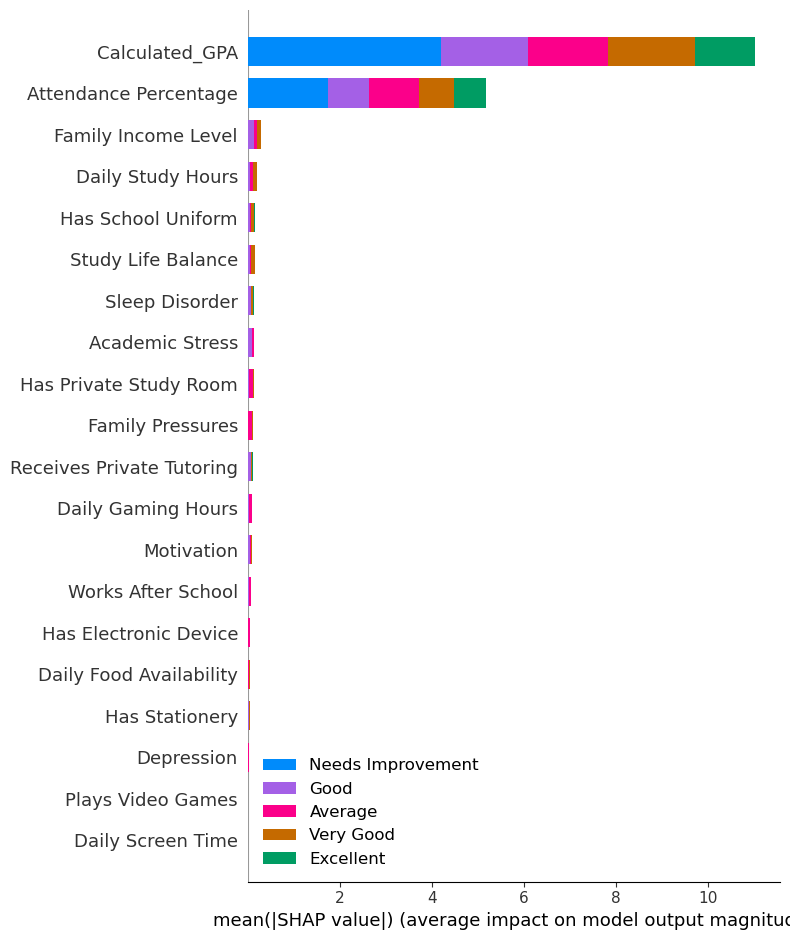

In [17]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model, X_train, feature_names=X.columns)

# Calculate SHAP values on test set
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, class_names=le.classes_, show=True)


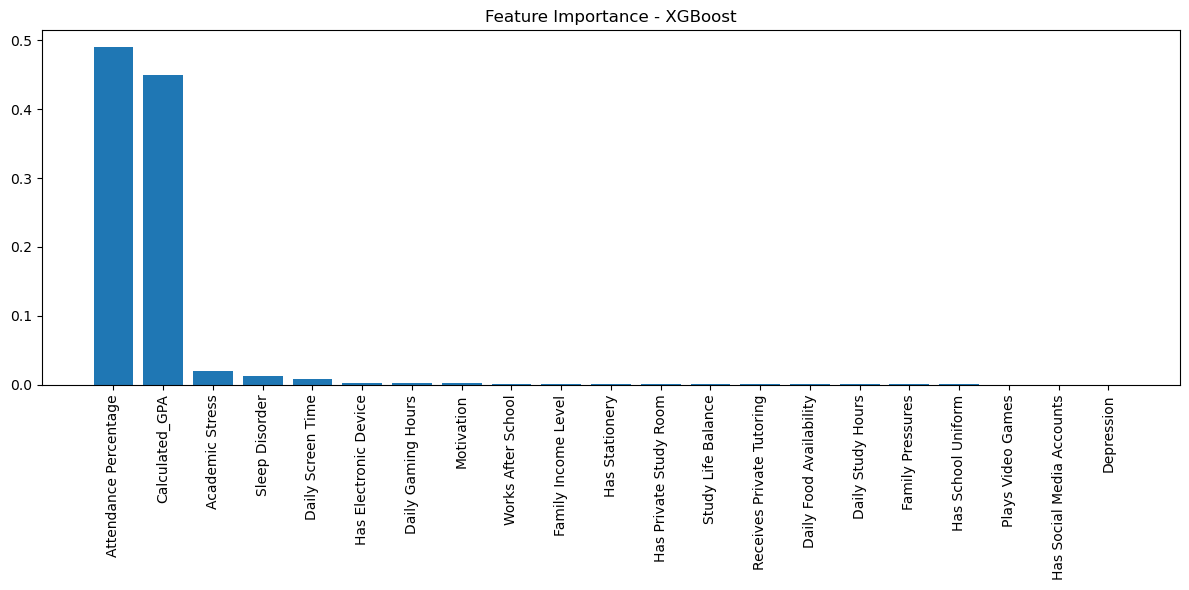

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - XGBoost")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'y_pred_xgb' is not defined

In [41]:
# Run XGBoost predictions (if not already done)
y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np

# Re-train Decision Tree on same data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_score_dt = dt_model.predict_proba(X_test)

# XGBoost predictions already exist (xgb_model, y_pred_xgb, y_score_xgb)

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_score=None):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "Recall": recall_score(y_true, y_pred, average="macro"),
        "F1": f1_score(y_true, y_pred, average="macro"),
        "Avg AUC": roc_auc_score(label_binarize(y_true, classes=np.unique(y_true)), y_score, average="macro", multi_class="ovr") if y_score is not None else None
    }

# Collect results
dt_results = evaluate_model("Decision Tree", y_test, y_pred_dt, y_score_dt)
xgb_results = evaluate_model("XGBoost", y_test, y_pred_xgb, y_score_xgb)

# Display as table
comparison_df = pd.DataFrame([dt_results, xgb_results])
comparison_df.iloc[:, 1:] = comparison_df.iloc[:, 1:].round(4)

print(" Model Comparison Table")
display(comparison_df)


 Model Comparison Table


,Model,Accuracy,Precision,Recall,F1,Avg AUC
0,Decision Tree,0.991,0.9888,0.9915,0.9901,0.9945
1,XGBoost,0.991,0.9876,0.9892,0.9883,1.0000


In [2]:
!pip install lime


  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=2f9f8b12e712eb8019435b6d2b6aee831ebe066ccf0feb85abca9136ad3fdaee
  Stored in directory: c:\users\laptop\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [6]:
# 0) Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import lime
from lime.lime_tabular import LimeTabularExplainer

# 1) Load the data
path = r"C:\Users\laptop\Desktop\exported_students_data.csv"
df = pd.read_csv(path)

# 2) Compute a numeric GPA from the "Grades" string
def parse_grades(grades_str):
    parts = grades_str.split(';')
    scores = []
    for part in parts:
        if ':' in part:
            try:
                _, score = part.split(':')
                scores.append(float(score))
            except:
                pass
    return np.mean(scores) if scores else np.nan

df['Calculated_GPA'] = df['Grades'].apply(parse_grades)

# 3) Create the performance_label
def classify_performance(gpa, attendance):
    if pd.isnull(gpa) or pd.isnull(attendance):
        return "Unknown"
    if gpa >= 90:
        label = "Excellent"
    elif gpa >= 80:
        label = "Very Good"
    elif gpa >= 70:
        label = "Good"
    elif gpa >= 60:
        label = "Average"
    else:
        label = "Needs Improvement"
    # adjust by attendance
    if attendance >= 95:
        upgrades = {
            "Very Good": "Excellent",
            "Good": "Very Good",
            "Average": "Good",
            "Needs Improvement": "Average"
        }
        label = upgrades.get(label, label)
    if attendance < 80:
        downgrades = {
            "Excellent": "Very Good",
            "Very Good": "Good",
            "Good": "Average",
            "Average": "Needs Improvement"
        }
        label = downgrades.get(label, label)
    return label

df['performance_label'] = df.apply(
    lambda r: classify_performance(r['Calculated_GPA'], r['Attendance Percentage']),
    axis=1
)

# 4) Drop irrelevant or string columns
drop_cols = ["Full Name", "Grades", "Academic Performance", "Seat Zone"]
df_model = df.drop(columns=drop_cols)

# 5) Ordinal‐encode some fields
ordinal_maps = {
    'Academic Stress':      {'Low': 1, 'Moderate': 2, 'High': 3},
    'Motivation':           {'Low': 1, 'Moderate': 2, 'High': 3},
    'Study Life Balance':   {'Needs Improvement': 1, 'Moderate': 2, 'Good': 3},
    'Family Pressures':     {'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3},
    'Sleep Disorder':       {'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_maps.items():
    df_model[col] = df_model[col].map(mapping)

# 6) Boolean → int
bool_cols = [
    'Depression', 'Has Private Study Room', 'Daily Food Availability',
    'Has School Uniform', 'Has Stationery', 'Receives Private Tutoring',
    'Works After School', 'Has Electronic Device', 'Has Social Media Accounts',
    'Plays Video Games'
]
for col in bool_cols:
    df_model[col] = df_model[col].astype(int)

# 7) Label‐encode the remaining categories
cat_cols = [
    'Parents Marital Status', 'Housing Status',
    'Device Usage Purpose', 'Social Media Impact On Studies',
    'Content Type Watched'
]
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# 8) Drop any rows still containing NaNs
df_model = df_model.dropna()

# 9) Split into X, y and then train/test
X = df_model.drop(columns=['performance_label'])
y = df_model['performance_label']
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42
)

# 10) Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 11) Evaluate
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 12) LIME explanation
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=le.classes_,
    mode='classification'
)
i = 0  # explain the first test instance
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=xgb_model.predict_proba,
    num_features=10
)
exp.show_in_notebook(show_table=True, show_all=False)


C:\Users\laptop\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9879679144385026
                   precision    recall  f1-score   support

          Average       0.97      0.98      0.98       189
        Excellent       1.00      1.00      1.00        54
             Good       0.98      0.96      0.97       152
Needs Improvement       1.00      1.00      1.00       262
        Very Good       1.00      1.00      1.00        91

         accuracy                           0.99       748
        macro avg       0.99      0.99      0.99       748
     weighted avg       0.99      0.99      0.99       748

Confusion Matrix:
 [[186   0   3   0   0]
 [  0  54   0   0   0]
 [  6   0 146   0   0]
 [  0   0   0 262   0]
 [  0   0   0   0  91]]
